In [1]:
import sympy
from sympy import Matrix, latex
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
from IPython.display import Latex
import numpy as np

# Практическое занятие 11
# Компьютерный практикум по алгебре на Python
## Линейные операторы на плоскости и в пространстве
### Задание 1.
Написать функцию, составляющую матрицу линейного оператора поворота на alpha градусов или радиан **по** или **против часовой стрелки** на плоскости. Параметры: обязательные - угол поворота, необязательные - тип меры угла (градусы или радианы), направление поворота (по или против часовой стрелки). Значения по умолчанию - против часовой стрелки в радианах.

Использовать полученную функцию для выведения на экран координат векторов, полученных поворотом вектора [1, 2] 

1) на 10, 20, 45 градусов **по  часовой стрелке**

2) на $\pi/3$ радиан **против часовой стрелки**.

In [2]:
def rotation (alpha, counterclockwise = True, radian = True):
    if radian:
        if counterclockwise:
            return Matrix([[Cos(alpha), -Sin(alpha)], [Sin(alpha), Cos(alpha)]])
        else:
            return Matrix([[Cos(-alpha), -Sin(-alpha)], [Sin(-alpha), Cos(-alpha)]])
    else:
        alpha = alpha*Pi/180
        if counterclockwise:
            return Matrix([[Cos(alpha), -Sin(alpha)], [Sin(alpha), Cos(alpha)]])
        else:
            return Matrix([[Cos(-alpha), -Sin(-alpha)], [Sin(-alpha), Cos(-alpha)]])
e = Matrix([1, 2])
list_rotations = [[10, False, False], [20, False, False], [45, False, False], [Pi/3]]
list_matrix = [sympy.eye(2)]
for k, i in enumerate(list_rotations):
    display(Latex(f'A_{k+1} = {latex(rotation(*i) * e)}'))
    list_matrix.append(rotation(*i))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Найти собственные числа и собственные векторы линейного оператора, заданного матрицей 
$$
\left(\begin{matrix}
-34&20&-5\\
-40&56&-20\\
20&-8&50
\end{matrix}\right)
$$
Воспользоваться eigenvals и eigenvects, проверить выполнение равенства нулю характеристического многочлена $|A-\lambda E|$ и условия $Ax=\lambda x$.


In [3]:
A = Matrix([[-34, 20, -5], [-40, 56, -20], [20, -8, 50]])
lambdas = A.eigenvals()
res = A.eigenvects()
display(Latex(latex(lambdas)))
display(Latex(latex(res)))
for vect in res:
    display(Latex(f'\lambda = {vect[0]}: \\ |A-\lambda E| = {sympy.det(A-vect[0]*sympy.eye(3))}; \\ Ax=\lambda x - {A*vect[2][0] == vect[0]*vect[2][0]}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 3.
Построить матрицу оператора из задания 2 в базисе из векторов $(1,1,1)$, $(0,5,3)$ и $(1,6,0)$.


In [4]:
P = Matrix([[1, 1, 1], [0, 5, 3], [1, 6, 0]]).T
A_new = P ** (-1) * A * P
display(Latex(f'P = {latex(P)}, \\ A = {latex(A)}, \\ A_{{new}} = {latex(A_new)}'))

<IPython.core.display.Latex object>

### Задание 4.
Построить матрицу оператора из задания 2 в базисе из собственных векторов с помощью eigenvects и матрицы перехода. Сравнить диагональные элементы с собственными числами.

In [5]:
P1 = res[0][2][0].row_join(res[1][2][0]).row_join(res[2][2][0])
A_new1 = P1 ** (-1) * A * P1
display(Latex(f'P_1 = {latex(P1)}, \\ A = {latex(A)}, \\ A_{{new1}} = {latex(A_new1)}'))

<IPython.core.display.Latex object>

# Задание 5*
Изобразить на графике вектор [1, 2] из Задания 1 и результаты его поворота (по Заданию 1). В легенде графика для каждого вектора, кроме [1, 2] указать матрицу поворота, а для [1, 2] единичную матрицу.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

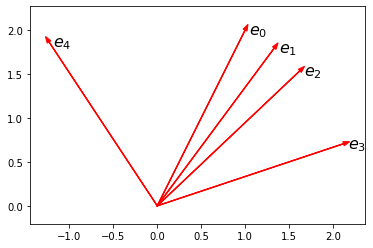

In [6]:
def plotvec(k, vect, **kwargs):
    x, y = [float(item) for item in vect]
    plt.plot([0, x], [0, y], **kwargs, )
    plt.arrow(0, 0, x, y, head_width=0.05, **kwargs)
    plt.annotate(f'$e_{k}$', xy=(x+0.05, y-0.05), fontsize=16) 
    return None

def plotvecs(vecscolors):
    for k, item in enumerate(vecscolors):
        plotvec(k, item[0], color=item[1])
    return None

plotvecs([(matrix*e, 'r') for matrix in list_matrix])
plt.axis('equal')
for k, i in enumerate(list_matrix):
    display(Latex(f'A_{k} = {latex(i)}'))

#Было сказано в итоге делать без легенды

###  Индивидуальное задание
Найти собственные числа и собственные векторы линейного оператора. Построить матрицу оператора в заданном базисе. Построить матрицу оператора в базисе из собственных векторов.

Вывести на экран матрицу оператора А, матрицу перехода к базису ($e_1$, $e_2$, $e_3$), матрицу оператора в базисе ($e_1$, $e_2$, $e_3$), матрицу перехода к базису из собственных векторов, матрицу оператора в базисе из собственных векторов.

Матрица оператора A, векторы базиса $e_1$, $e_2$, $e_3$:
$$A = \left[\begin{matrix}21 & -27 & 38\\48 & -39 & 52\\27 & - \frac{9}{2} & 12\end{matrix}\right],\quad e_1 = \left[\begin{matrix}3\\-2\\2\end{matrix}\right],\quad e_2 = \left[\begin{matrix}-3\\4\\-1\end{matrix}\right],\quad e_3 = \left[\begin{matrix}2\\-4\\2\end{matrix}\right]$$

In [7]:
A = Matrix([[21, -27, 38], [48, -39, 52], [27, -sympy.S(9)/2, 12]])
e1 = Matrix([3, -2, 2])
e2 = Matrix([-3, 4, -1])
e3 = Matrix([2, -4, 2])
lambdas = A.eigenvals()
res = A.eigenvects()
display(Latex(latex(lambdas)))
display(Latex(latex(res)))
P1 = e1.row_join(e2).row_join(e3)
P2 = res[0][2][0].row_join(res[1][2][0]).row_join(res[2][2][0])
A_new1 = P1 ** (-1) * A * P1
A_new2 = P2 ** (-1) * A * P2
display(Latex(f'A = {latex(A)}, \\ P_1 = {latex(P1)}, \\ A_{{new1}} = {latex(A_new1)}'))
display(Latex(f'A = {latex(A)}, \\ P_2 = {latex(P2)}, \\ A_{{new2}} = {latex(A_new2)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>